## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv
/kaggle/input/iris-dataset-with-outliers/Iris_with_outliers.csv


# Reading Datasets and Overview

Read Data

In [2]:
data_iris = pd.read_csv('/kaggle/input/iris-dataset-with-outliers/Iris_with_outliers.csv')
print('Read')

Read


Overview, First Look

In [3]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     173 non-null    int64  
 1   Id             173 non-null    int64  
 2   SepalLengthCm  170 non-null    float64
 3   SepalWidthCm   172 non-null    float64
 4   PetalLengthCm  169 non-null    float64
 5   PetalWidthCm   171 non-null    float64
 6   Species        173 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.6+ KB


In [4]:
data_iris.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

Dropping unnecessary columns

In [5]:
data_iris.drop(labels=data_iris.columns[0], axis=1, inplace=True)
print("dropped")

dropped


In [6]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [7]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             173 non-null    int64  
 1   SepalLengthCm  170 non-null    float64
 2   SepalWidthCm   172 non-null    float64
 3   PetalLengthCm  169 non-null    float64
 4   PetalWidthCm   171 non-null    float64
 5   Species        173 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [8]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,173.000000,170.000000,172.000000,169.000000,171.000000
mean,86.000000,5.834118,3.068605,3.718935,1.171345
std,50.084928,0.844972,0.444922,1.778207,0.763774
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,43.000000,5.100000,2.800000,1.500000,0.300000
50%,86.000000,5.800000,3.000000,4.300000,1.300000
75%,129.000000,6.400000,3.400000,5.100000,1.800000
max,172.000000,8.000000,4.400000,6.900000,2.500000


In [9]:
data_iris.groupby('Species').agg(["min","max","std","mean"])

Id                      SepalLengthCm                 \
                 min  max        std mean           min  max       std   
Species                                                                  
Iris-setosa        0   60  17.752934   30           4.3  6.9  0.433247   
Iris-versicolor   61  115  16.020820   88           4.9  8.0  0.583622   
Iris-virginica   116  172  16.598193  144           4.9  7.9  0.644487   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.023729          2.3  4.4  0.392511  3.381667           1.0   
Iris-versicolor  5.970370          2.0  4.4  0.379012  2.807273           1.5   
Iris-virginica   6.543860          2.2  3.9  0.354200  2.991228           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.681890  1.605085          0.1  2.1  0.293715  0.298333  
Iris-versicolor  5.1  0.617330  4.192453          0.4  1.8  0.232871  1.314545  
Iris-virginica   6.9  0.788383  5.466667          0.4  2.5  0.402843  1.966071

Checking There is NaN values or not.

In [10]:
data_iris.isnull().values.any()

True

In [11]:
data_iris.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

If there was NaN values, I could assign the average values with the sample script below.

In [12]:
for column in data_iris.columns[1:-1]:
    data_iris[column].fillna(value=data_iris[column].mean(), inplace=True)

## Visualizing Data

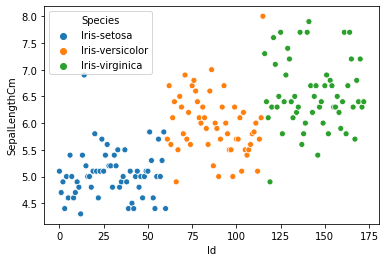

In [13]:
sns.scatterplot(data=data_iris, x="Id",y="SepalLengthCm",hue="Species")

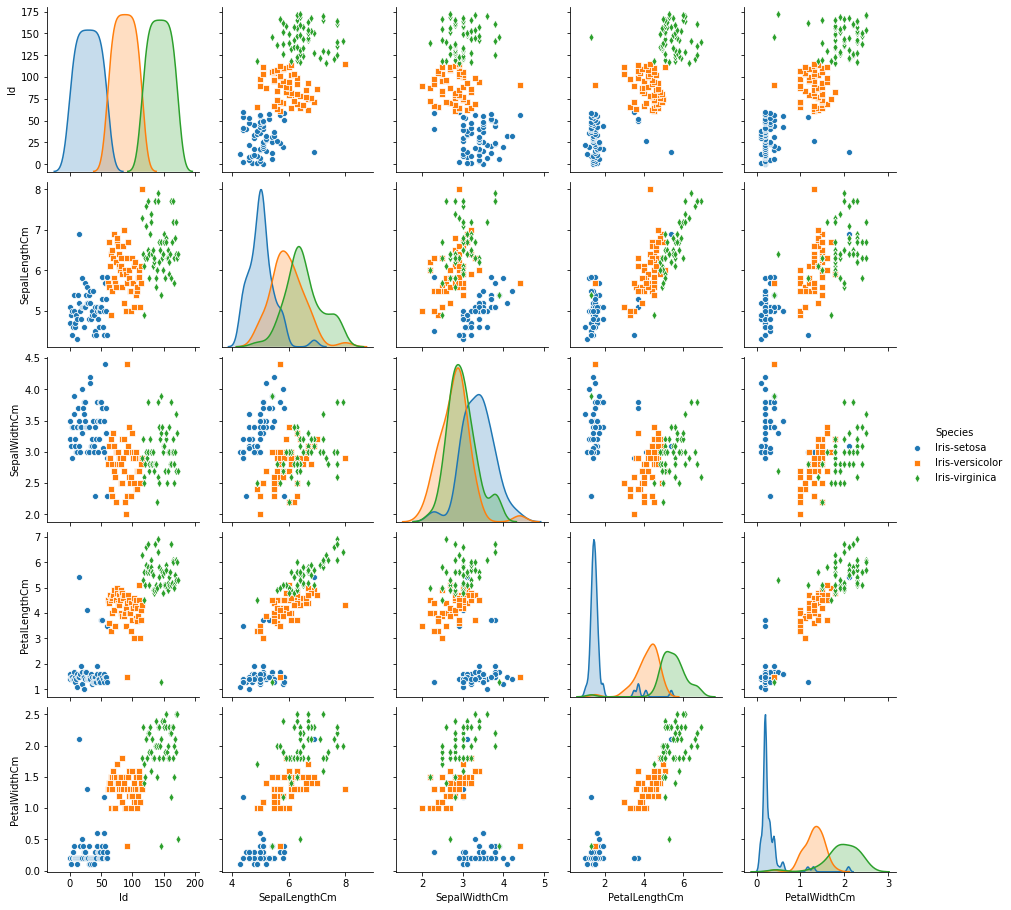

In [14]:
sns.pairplot(data = data_iris, hue="Species", markers=["o","s","d"]);

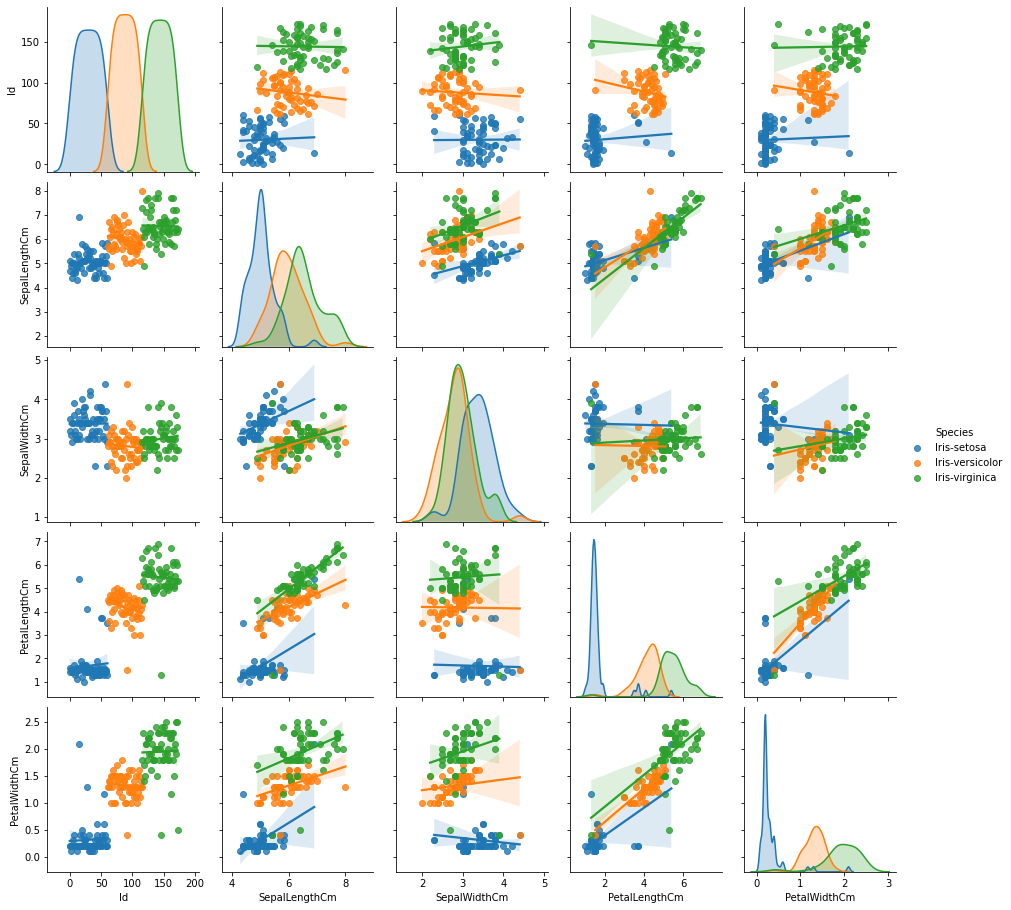

In [15]:
sns.pairplot(data = data_iris, kind="reg", hue="Species");

## Outlier Detection

3 Sigma Methodology

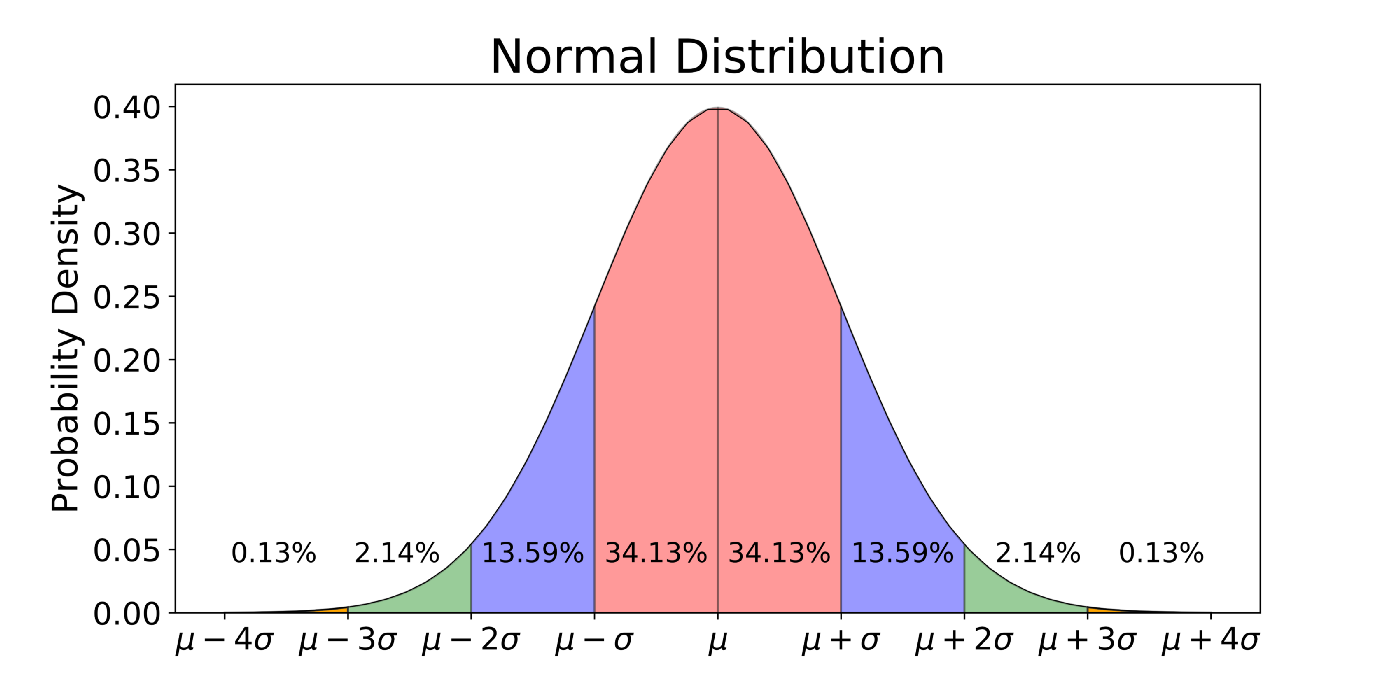

In [16]:
data_iris.shape

(173, 6)

In [17]:
for column in data_iris.columns[1:-1]:
    for specy in data_iris["Species"].unique():
        Specy_type=data_iris[data_iris["Species"]==specy]
        Selected_column=Specy_type[column]
        avg = Selected_column.mean()
        std = Selected_column.std()
        upper_lmt = avg + (3 * std) 
        lower_lmt= avg - (3 * std)
        outliers=Selected_column[((Selected_column > upper_lmt) | (Selected_column< lower_lmt))].index # picking outliers' indeces
        data_iris.drop(index=outliers, inplace=True) # dropping outliers
        print(column,specy,outliers)               

SepalLengthCm Iris-setosa Int64Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([115], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([91], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([27, 50, 52, 60], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([146], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([172], dtype='int64')


IQR - Interquartile Range

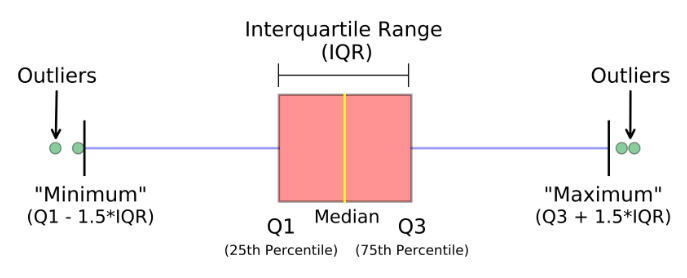

In [18]:
for column in data_iris.columns[1:-1]:
    for specy in data_iris["Species"].unique():
        Specy_type = data_iris[data_iris["Species"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        data_iris.drop(index = outlierss, inplace=True) # dropping outliers
        
        
        

Int64Index([51, 59], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([119], dtype='int64')
Int64Index([41, 56], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([22], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([19, 43, 55], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [19]:
data_iris.to_csv("updated_data.csv")

## Modelling

Difference between One-Hot Encoding and Label Encoding

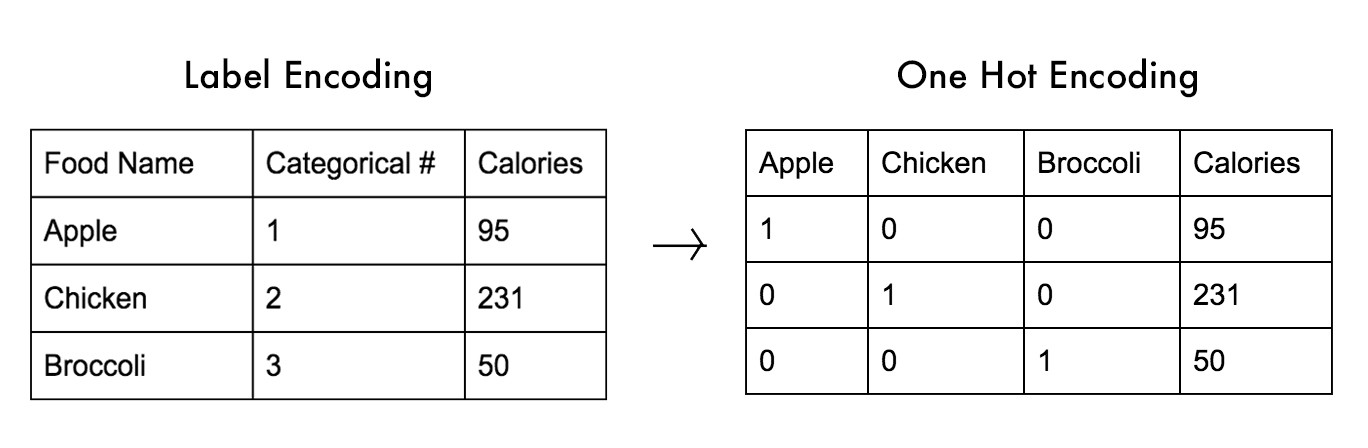

Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [21]:
import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/updated_data.csv
/kaggle/working/__notebook__.ipynb


In [22]:
data = pd.read_csv("/kaggle/working/updated_data.csv")
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [23]:
data.drop(data.columns[0:2], axis=1, inplace=True)
data.head()
print("dropped columns")

dropped columns


In [24]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [25]:
labenc= LabelEncoder()
data["Species"] = labenc.fit_transform(data["Species"]) # transforming Species column into label encoding format

In [26]:
data.head() # check this out

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.9,3.1,1.5,0.1,0
3,4.4,2.9,1.4,0.2,0
4,5.0,3.4,1.5,0.2,0


Small controls before modelling

In [27]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

Building the Model

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train , x_test , y_train , y_test = train_test_split( data.iloc[:,0:-1] , data.iloc[:,-1] , test_size=0.2 )

In [31]:
import xgboost as xgb 

In [32]:
xgb_clsfr = xgb.XGBClassifier(objective="multiclass:softmax", num_class=3)

In [33]:
xgb_clsfr.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [34]:
predictions = xgb_clsfr.predict(x_test)
predictions

array([0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 2])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
accuracy_score(y_test, predictions)

1.0

In [37]:
confusion_matrix(y_test,predictions)

array([[14,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 10]])